In [261]:
index = 1
col = float_cols[index]

count   5,531,451.000
mean            0.229
std             4.797
min            -0.003
25%             0.029
50%             0.111
75%             0.296
max         4,097.441
Name: B_10, dtype: float64


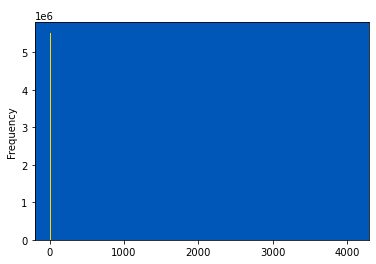

count   11,363,762.000
mean             0.239
std              5.538
min             -0.003
25%              0.029
50%              0.115
75%              0.296
max          4,660.357
Name: B_10, dtype: float64


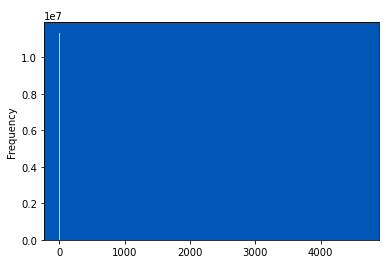

In [262]:
compare_train_test_distribution(train, test, col)

In [263]:
print(f"Train missing proportion {train[col].isnull().sum() / train.shape[0]:.2%}")
print(f"Test missing proportion {test[col].isnull().sum() / test.shape[0]:.2%}")

Train missing proportion 0.00%
Test missing proportion 0.00%


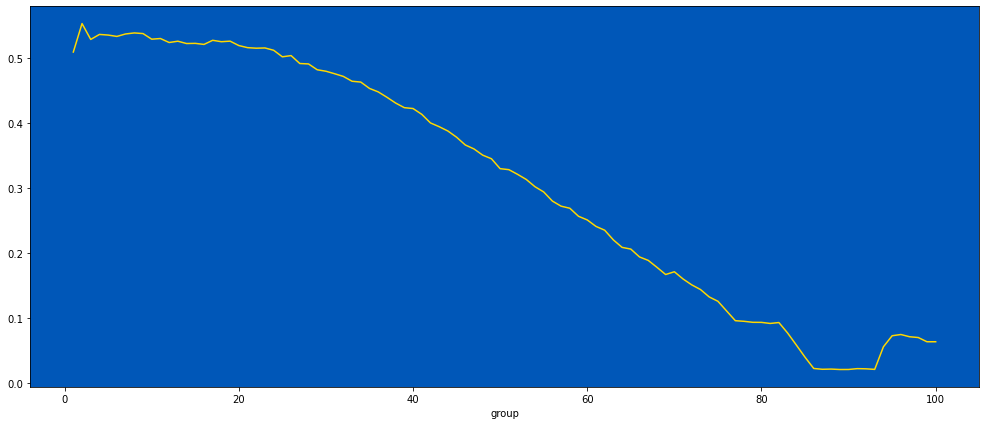

In [264]:
plt.figure(figsize=(17, 7))
train["group"] = pd.qcut(train[col].drop_duplicates(), q=100).cat.codes + 1
train.groupby(["group"])["target"].mean().plot() # "row_number", 
plt.show()

In [271]:
np.percentile(train[col].dropna(), 99.6)

2.4658042907714854

In [248]:
t1 = train.loc[train[col].between(3.2, 50)]
t1["target"].mean(), t1.shape[0]

(0.2264020309254558, 4333)

In [249]:
t2 = train.loc[train[col].between(1, 2)]
t2["target"].mean(), t2.shape[0]

(0.33489607751211126, 44793)

In [114]:
t2 = train.loc[train[col].between(0.06, 0.07)]
t2["target"].mean(), t2.shape[0]

(0.26009246653816603, 148378)

In [76]:
train.loc[train[col].isnull()]["target"].mean()

0.3005334772572064

In [241]:
train.loc[train[col].between(0.2, 0.3)]["target"].mean()

0.08370293532198828

In [219]:
train.loc[train[col] == 0]["target"].mean()

0.2085656683224908

In [220]:
train.loc[train[col] > 0]["target"].mean()

0.5203464529649717

In [171]:
train.loc[train[col].between(-1, 0.25)]["target"].mean()

0.18761871376099448

In [158]:
train["target"].mean()

0.24909720794778803

In [56]:
# test[col].isnull().sum()

In [57]:
# train.loc[train[col] > 0.0][col]  # .between(0.01, 0.99)

In [58]:
# np.percentile(test[col], 99)

In [59]:
# train.loc[train[col].between(0.001, 0.1)]["target"].mean()

In [60]:
# train.loc[train[col] > 0][["customer_ID", "D_41", "target"]].tail(50)

In [24]:
float_cols = train.select_dtypes(np.float).columns.tolist()
float_cols = sorted(float_cols)

### B_1

In [125]:
column = "B_1"

In [126]:
b1_min_outlier_thr = -0.05

In [128]:
train.loc[train[column] < b1_min_outlier_thr, column] = b1_min_outlier_thr
test.loc[test[column] < b1_min_outlier_thr, column] = b1_min_outlier_thr

### B_9

In [ ]:
column = "B_9"

In [ ]:
%%time
train.loc[train[column] > 1, column] = 1
test.loc[test[column] > 1, column] = 1

CPU times: user 32 ms, sys: 4.06 ms, total: 36 ms
Wall time: 16.3 ms


### B_14

In [220]:
column = "B_14"

In [221]:
%%time
train.loc[train[column] < 0, column] = 0
test.loc[test[column] < 0, column] = 0

CPU times: user 37.8 ms, sys: 9.93 ms, total: 47.8 ms
Wall time: 28.5 ms


In [250]:
%%time
value = 3
train.loc[train[column] > value, column] = value
test.loc[test[column] > value, column] = value

CPU times: user 35.4 ms, sys: 5.98 ms, total: 41.4 ms
Wall time: 19.9 ms


### B_27

In [32]:
column = "B_27"

In [33]:
%%time
train = train.drop(columns=column, errors="ignore")
test = test.drop(columns=column, errors="ignore")

CPU times: user 829 ms, sys: 3.03 s, total: 3.86 s
Wall time: 6.3 s


In [34]:
gc.collect()

10620